Welcome to the Pizza Analysis Notebook, in this notebook we will analyze the order details dataset and analyze user pizza orders based on their various attributes and frequency. The datasets can be found [Here](https://www.kaggle.com/datasets/umairhayat/pizza-data-set-order-detail/data?select=pizzas.csv) thanks to user [Umair Hayat](https://www.kaggle.com/umairhayat) on Kaggle.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

order_details = pd.read_csv('Pizza-Data/order_details.csv')
orders = pd.read_csv('Pizza-Data/orders.csv')
pizza_types = pd.read_csv('Pizza-Data/pizza_types.csv', encoding='ISO-8859-1')
pizzas = pd.read_csv('Pizza-Data/pizzas.csv')

The first few steps are just importing the libraries, we need and then reading the files we will use, we have done this using pandas and the read csv method since all they all are csv files. Next we will just look at the first few rows of each dataset to get a small sense of what they could bring us and what they hold.

---

In [2]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [3]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


These two datasets as we can see track the pizzas per order and the date time they were made respectively, the order id seems to be a common key between the two which can be used to combine the datasets into one compact set.

In [4]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [5]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


Pizzas and Pizza Types both document the various types of pizza you can order and the prices per size respectively, they can be used to determine average customer spending per size and even per category or pizza.

In [6]:
modified_orders = order_details.drop('order_details_id', axis=1)
customer_orders = modified_orders.merge(orders,on='order_id')
customer_orders.head()

,order_id,pizza_id,quantity,date,time
0,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,classic_dlx_m,1,2015-01-01,11:57:40
2,2,five_cheese_l,1,2015-01-01,11:57:40
3,2,ital_supr_l,1,2015-01-01,11:57:40
4,2,mexicana_m,1,2015-01-01,11:57:40


Using pandas we have merged order_details and orders, with this we can now access the full data of a users data without having to go through each one, along with this we have dropped order details id since we will not be needing it for our purposes. Now we wil see the average amount of pizza per customer, as well as which pizzas has been ordered more.

---

In [7]:
((customer_orders['pizza_id'].value_counts(normalize=True))*100).round(2)

pizza_id
big_meat_s        3.72
thai_ckn_l        2.81
five_cheese_l     2.80
four_cheese_l     2.62
classic_dlx_m     2.38
                  ... 
mexicana_s        0.33
calabrese_s       0.20
ckn_alfredo_s     0.20
green_garden_l    0.19
the_greek_xxl     0.06
Name: proportion, Length: 91, dtype: float64

In [8]:
pizza = customer_orders['pizza_id'].str[:-2]
popular_pizzas = ((pizza.value_counts(normalize=True))*100).round(2)
popular_pizzas

pizza_id
classic_dlx     4.97
bbq_ckn         4.88
hawaiian        4.87
pepperoni       4.87
thai_ckn        4.76
cali_ckn        4.73
sicilian        3.88
spicy_ital      3.88
southw_ckn      3.88
four_cheese     3.81
ital_supr       3.80
big_meat        3.72
veggie_veg      3.11
mexicana        2.99
napolitana      2.98
spinach_fet     2.95
prsc_argla      2.94
peppr_salami    2.92
ital_cpcllo     2.91
five_cheese     2.80
pep_msh_pep     2.76
green_garden    2.03
ckn_alfredo     2.02
ital_veggie     2.01
ckn_pesto       1.98
spin_pesto      1.97
soppressata     1.97
spinach_supr    1.93
calabrese       1.91
mediterraneo    1.90
the_greek       1.72
the_greek_      1.12
brie_carre      0.99
the_greek_x     0.06
Name: proportion, dtype: float64

In [9]:
pizza_quantity = customer_orders.groupby('order_id')['quantity'].sum().reset_index()
pizza_quantity['quantity'].agg(['mean','min','max']).round()

mean     2.0
min      1.0
max     28.0
Name: quantity, dtype: float64

First, the average customer orders around 2 pizzas, we see the maximum amount of pizzas someone has ordered is 28 which points to a possible skew in the data, aside from this we will now look at the most popular pizzas. The first analysis points out that the 5 most popular pizzas are the big meat small, thai chicken large, and then the four five cheese large along with the classic deluxe medium, this changes when we check for the most popular regardless of size, because when we search for that the 5 most popular pizzas shift to the classic deluxe, barbecue chicken, hawaiian, pepperoni, and the thai chicken. We can safely assume the most popular pizzas are the thai chicken and the classic deluxe are the two most popular pizzas as they make the top of the charts in both cases.

---

Now that we have looked at that we will compare the most popular pizzas to their respective category and the amount of ingredients they have, with this we can see if there is a correlation and determine what the optimal pizza category and ingredient count is.

In [10]:
popular_pizzas_df = pd.DataFrame(popular_pizzas)
pizza_types['pizza_id'] = pizza_types['pizza_type_id']
popular_pizzas_df = popular_pizzas_df.merge(pizza_types,on='pizza_id')
popular_pizzas_df = popular_pizzas_df.drop(['name','pizza_type_id'],axis=1)
popular_pizzas_df

,pizza_id,proportion,category,ingredients
0,classic_dlx,4.97,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
1,bbq_ckn,4.88,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,hawaiian,4.87,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,pepperoni,4.87,Classic,"Mozzarella Cheese, Pepperoni"
4,thai_ckn,4.76,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
5,cali_ckn,4.73,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
6,sicilian,3.88,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives..."
7,spicy_ital,3.88,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ..."
8,southw_ckn,3.88,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
9,four_cheese,3.81,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."


In [11]:
def ingredient_count(x):
    ingredient_amount = x.split(', ')
    return len(ingredient_amount)
popular_pizzas_df['ingredients'] = popular_pizzas_df['ingredients'].apply(ingredient_count)
popular_pizzas_df.head()

,pizza_id,proportion,category,ingredients
0,classic_dlx,4.97,Classic,5
1,bbq_ckn,4.88,Chicken,6
2,hawaiian,4.87,Classic,3
3,pepperoni,4.87,Classic,2
4,thai_ckn,4.76,Chicken,5


After a few tweaks we now can see the category the top 5 most pizzas have and the amount of ingredients they contain, based on pepperoni we can see that the the dough and the sauce are not counted, with this three of the top 5 contain more than or equal to 5 ingredients, but to gain a deeper understanding of this we wil need to graph the data, and make use of our other packages at last.

---

<Axes: xlabel='proportion', ylabel='ingredients'>

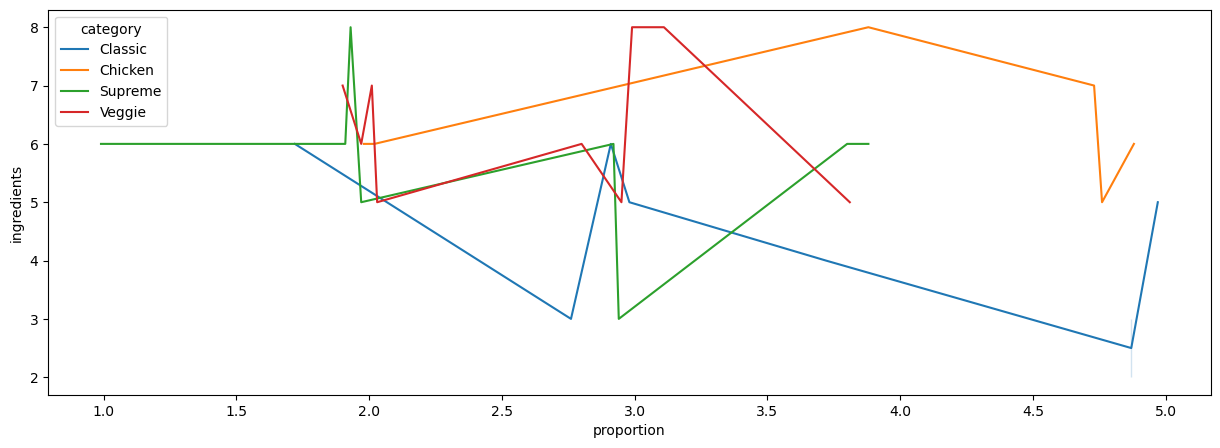

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(data=popular_pizzas_df,x='proportion',y='ingredients',hue='category')

<Axes: xlabel='category', ylabel='proportion'>

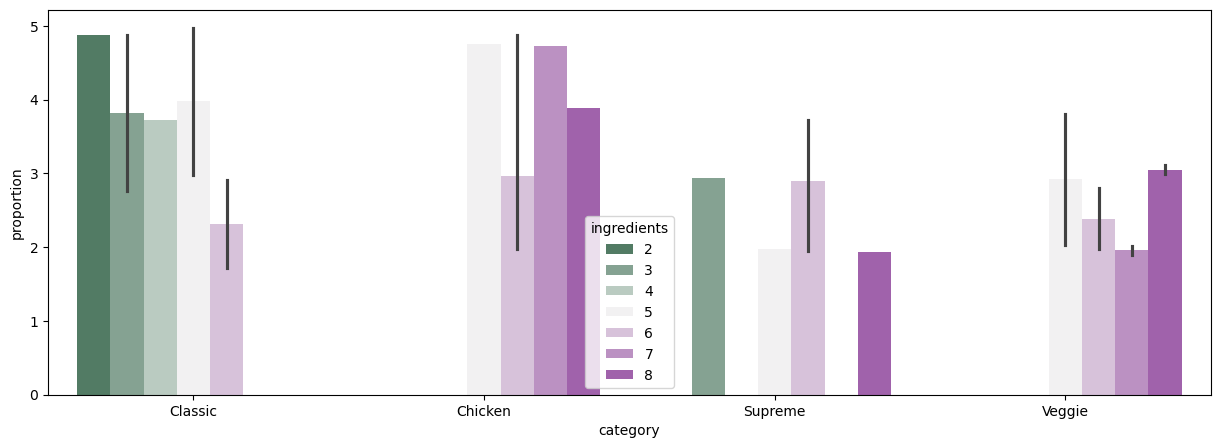

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(data=popular_pizzas_df,x='category',y='proportion',hue='ingredients', palette=sns.diverging_palette(145, 300, s=60, as_cmap=True))

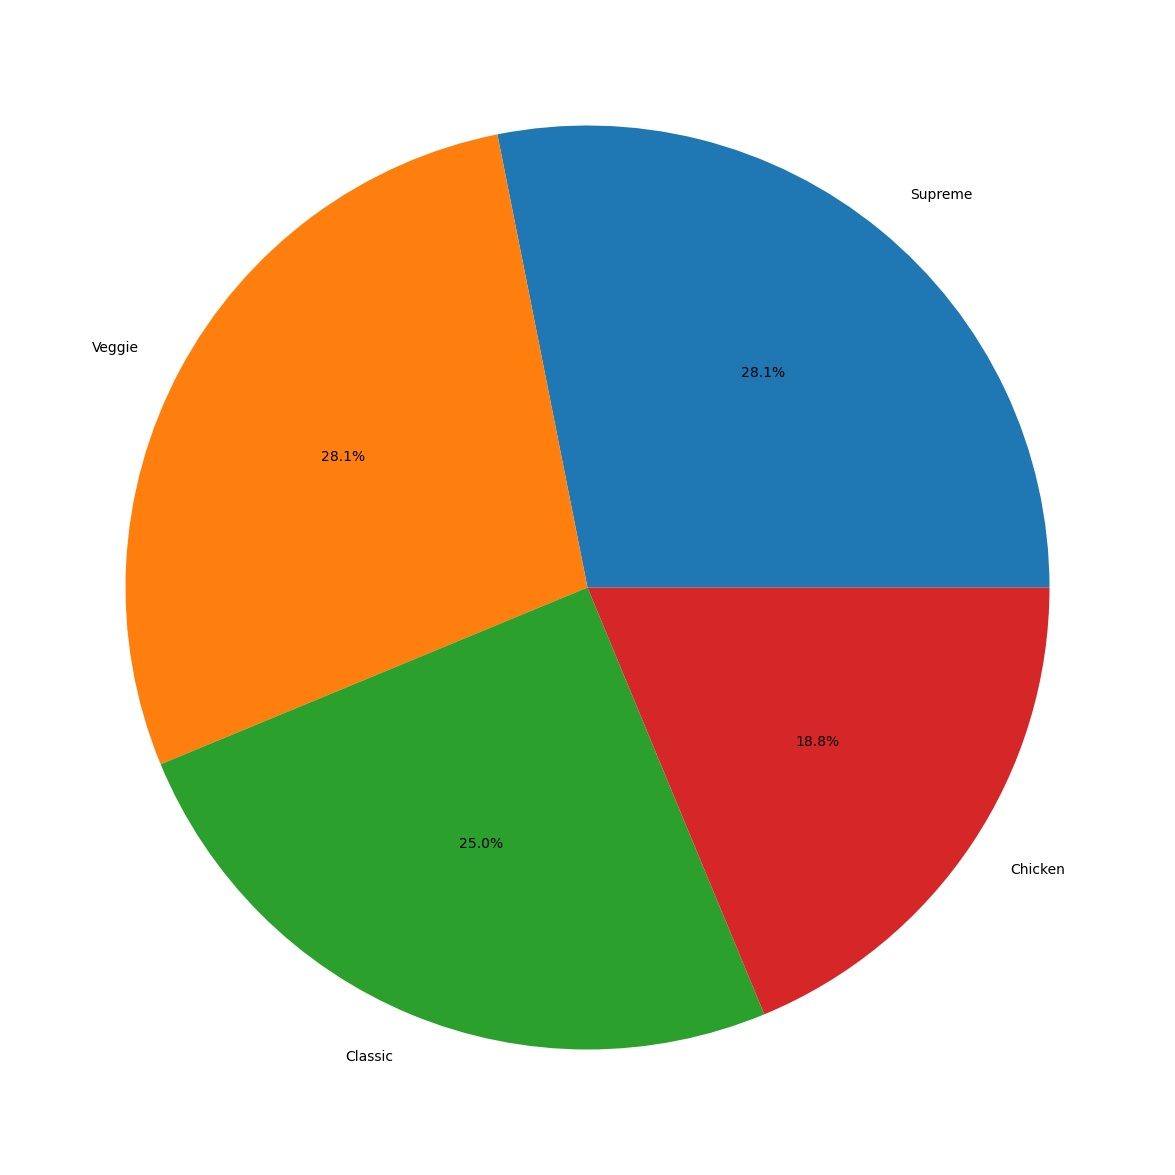

In [20]:
plt.figure(figsize=(15,15))
category_count = popular_pizzas_df['category'].value_counts()
category_count.plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

Based on the charts we can tell chicken and classic take the lead, even in the second chart with much more depth the supreme and veggie categories barely reach the lowest popular of the chicken category, while veggie is understandable as that is more reserved for vegetarians, supreme is a surprise as it and classic are closely related. The possible reason for this is that classic has a heavy nostalgia factor that pushes it forward while chicken is pushed for its actual flavor since the most popular chicken pizzas have more than 4 ingredients.